In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr, entropy, iqr, spearmanr
import matplotlib.pyplot as plt
%matplotlib inline

## Home data analysis

In [2]:
Datahome = pd.read_csv('GPSandClinicalData_Home.csv')

In [3]:
Datahome['Duration_Wearing']=Datahome['Duration']*Datahome['Wear Frac']

In [4]:
Datahome.head()

,Wear Frac,Duration,Mean Speed,SubjID,NewBrace,LocID,Steps,Age,Diagnosis,BaselineYrs,6mwt,10mwt_ss,10mwt_fast,Steps per Hour,Steps per Hour Wear,Duration_Wearing
0,0.033473,2.652778,0.076119,CBR21,1,0,30,65,poliomyelitis,60.0,231.93,0.69,0.85,11.308901,337.853403,0.088796
1,0.000000,18.044444,0.037787,CBR21,1,0,0,65,poliomyelitis,60.0,231.93,0.69,0.85,0.000000,NaN,0.000000
2,0.000000,4.041667,0.063728,CBR21,1,0,0,65,poliomyelitis,60.0,231.93,0.69,0.85,0.000000,NaN,0.000000
3,0.000000,12.708333,0.046796,CBR21,1,0,0,65,poliomyelitis,60.0,231.93,0.69,0.85,0.000000,NaN,0.000000
4,0.000000,1.600000,0.212844,CBR21,1,0,0,65,poliomyelitis,60.0,231.93,0.69,0.85,0.000000,NaN,0.000000


Text(0.5,1,'Usage time at Home')

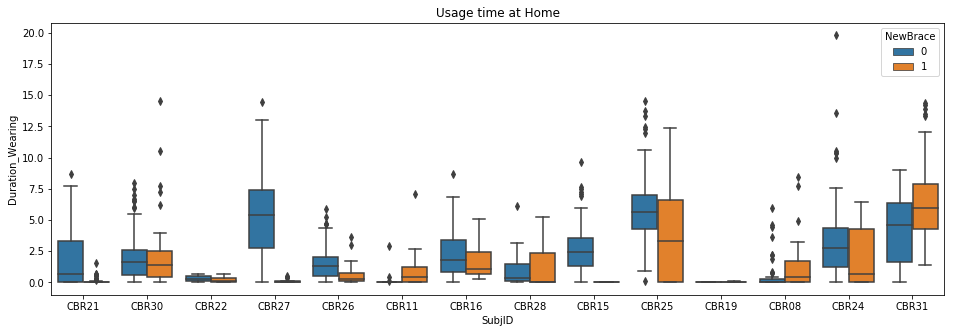

In [5]:
plt.figure(figsize=(16,5))
sns.boxplot(data=Datahome,x='SubjID',y='Duration_Wearing',hue='NewBrace')
plt.title('Usage time at Home')

In [107]:
#compute mean duration/day for each participant
ind = 0
cols = ['SubjID','Duration_Mean','Duration_Median','WearFrac','NewBrace']
homedur = pd.DataFrame(data=[],columns=cols)
for newbrace in Datahome.NewBrace.unique():
    for s in Datahome.SubjID.unique():
        d = Datahome[(Datahome.SubjID==s)&(Datahome.NewBrace==newbrace)]
        meandur = (d['Duration']).mean()
        mediandur =(d['Duration']).median()
        wearfrac = np.sum(d['Wear Frac']*d['Duration'])/np.sum(d['Duration'])
        sixmwt = np.mean(d['6mwt'])
        steps = np.nanmean(d['Steps'])
        stepsHr = np.nanmean(d['Steps per Hour'])
        
        homedur_ = pd.DataFrame({cols[0]:s, cols[1]:meandur, cols[2]:mediandur, cols[3]:wearfrac,
                                 cols[4]:newbrace, '6mwt':sixmwt, 'Steps':steps, 'Steps per Hour':stepsHr},index=[ind])
        homedur = pd.concat([homedur,homedur_])
        ind+=1

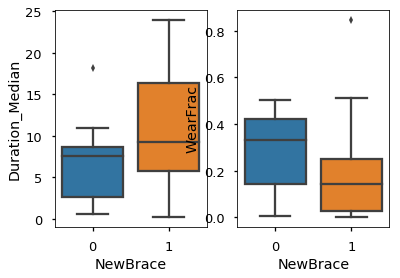

In [108]:
fig = plt.figure()
fig.add_subplot(121)
sns.boxplot(x='NewBrace',y='Duration_Median',data=homedur)
# fig.add_subplot(122)
# sns.boxplot(x='NewBrace',y='Duration_Mean',data=homedur)
fig.add_subplot(122)
sns.boxplot(x='NewBrace',y='WearFrac',data=homedur)

In [109]:
homedurmelt.variable.unique()

array(['6mwt', 'Duration_Mean', 'Duration_Median', 'Steps',
       'Steps per Hour', 'SubjID', 'WearFrac'], dtype=object)

In [67]:
homedurmelt=pd.melt(homedur,id_vars='NewBrace',value_vars=list(homedur.columns).remove('NewBrace'))

In [10]:
sns.boxplot(data=durhome,x=)

SyntaxError: invalid syntax (<ipython-input-10-4d396a88b0b9>, line 1)

## Community data analysis

In [68]:
# Data = pd.read_csv('GPSData.csv')
Data = pd.read_csv('GPSandClinicalData.csv')

In [69]:
Data.head()

,Wear Frac,DestinationType,Distance,Duration,Mean Speed,TripDuration,Relative_Freq,Relative_Duration,SubjID,NewBrace,...,Steps per Hour Wear,Age,Diagnosis,BaselineYrs,6mwt,10mwt_ss,10mwt_fast,Mean Lat,Mean Lon,LocID
0,0.015000,Res,12.229512,2.772222,0.215601,0.017824,0.014925,0.021452,CBR21,1,...,0.0,65,poliomyelitis,60.0,231.93,0.69,0.85,41.732207,-88.132441,2
1,0.063091,Inst,6.302016,1.758333,0.230411,0.011921,0.014925,0.013607,CBR21,1,...,0.0,65,poliomyelitis,60.0,231.93,0.69,0.85,41.783632,-88.188553,3
2,0.000000,Com,5.095353,1.016389,0.591493,0.008218,0.014925,0.007865,CBR21,1,...,NaN,65,poliomyelitis,60.0,231.93,0.69,0.85,41.765985,-88.206360,4
3,0.000000,Com,5.172335,0.366111,1.607549,0.001505,0.029851,0.004252,CBR21,1,...,NaN,65,poliomyelitis,60.0,231.93,0.69,0.85,41.760925,-88.208135,5
4,0.000000,Com,2.871296,0.052778,4.483316,0.003704,0.044776,0.001827,CBR21,1,...,NaN,65,poliomyelitis,60.0,231.93,0.69,0.85,41.760981,-88.242395,6


In [70]:
Data['Duration_Wearing']=Data['Duration']*Data['Wear Frac']

In [71]:
len(Data)

2181

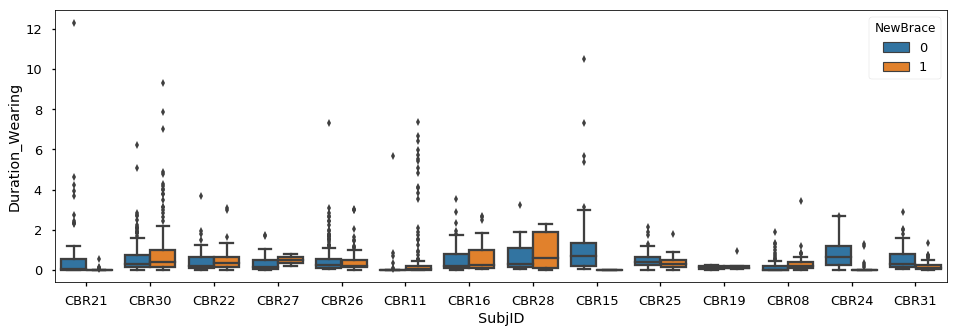

In [72]:
plt.figure(figsize=(16,5))
sns.boxplot(data=Data,x='SubjID',y='Duration_Wearing',hue='NewBrace')

In [110]:
#compute mean duration/day for each participant
ind = 0
cols = ['SubjID','Duration_Mean','Duration_Median','WearFrac','NewBrace']
dur = pd.DataFrame(data=[],columns=cols)
for newbrace in Data.NewBrace.unique():
    for s in Data.SubjID.unique():
        d = Data[(Data.SubjID==s)&(Data.NewBrace==newbrace)]
        meandur = (d['Duration']*d['Wear Frac']).mean()
        mediandur =(d['Duration']*d['Wear Frac']).median()
        wearfrac = np.sum(d['Wear Frac']*d['Duration'])/np.sum(d['Duration'])
        steps = np.nanmean(d['Steps'])
        stepsHr = np.nanmean(d['Steps per Hour'])
        
        dur_ = pd.DataFrame({cols[0]:s, cols[1]:meandur, cols[2]:mediandur, cols[3]:wearfrac,
                                 cols[4]:newbrace, 'Steps':steps, 'Steps per Hour':stepsHr},index=[ind])
        dur = pd.concat([dur,dur_])
        ind+=1

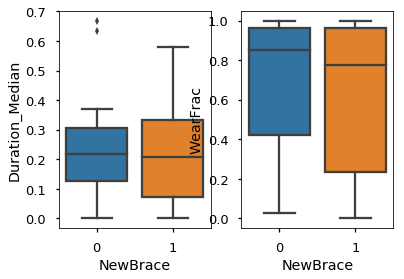

In [111]:
fig = plt.figure()
fig.add_subplot(121)
sns.boxplot(x='NewBrace',y='Duration_Median',data=dur)
# fig.add_subplot(122)
# sns.boxplot(x='NewBrace',y='Duration_Mean',data=homedur)
fig.add_subplot(122)
sns.boxplot(x='NewBrace',y='WearFrac',data=dur)

## Combined Home-Community analysis

In [112]:
#summary plot
homedur['Loc']='Home'
dur['Loc']='Community'
durdata = pd.concat([homedur,dur])

In [113]:
print('MedianHome Baseline = %.2f h'%homedur[homedur['NewBrace']==0]['Duration_Median'].median())
print('MedianHome Cbrace = %.2f h'%homedur[homedur['NewBrace']==1]['Duration_Median'].median())
print('MedianComm Baseline = %.2f h'%dur[dur['NewBrace']==0]['Duration_Median'].median())
print('MedianComm Cbrace = %.2f h'%dur[dur['NewBrace']==1]['Duration_Median'].median())

MedianHome Baseline = 7.62 h
MedianHome Cbrace = 9.27 h
MedianComm Baseline = 0.22 h
MedianComm Cbrace = 0.21 h


In [114]:
print('MedianHome difference = %.2f h'%(homedur[homedur['NewBrace']==1]['Duration_Median'].median() - 
     homedur[homedur['NewBrace']==0]['Duration_Median'].median()))

print('MedianComm difference = %.2f h'%(homedur[homedur['NewBrace']==1]['Duration_Median'].median() - 
     homedur[homedur['NewBrace']==0]['Duration_Median'].median()))


MedianHome difference = 1.65 h
MedianComm difference = 1.65 h


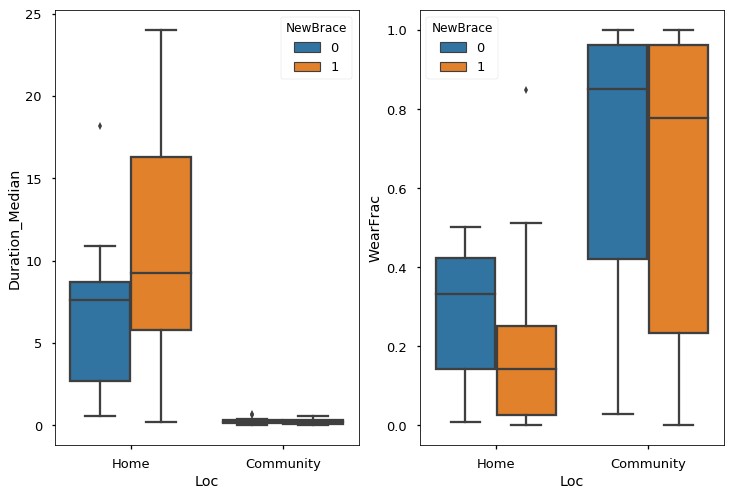

In [115]:
fig=plt.figure(figsize=(12,8))
fig.add_subplot(121)
sns.boxplot(data=durdata,x='Loc',y='Duration_Median',hue='NewBrace')
fig.add_subplot(122)
sns.boxplot(data=durdata,x='Loc',y='WearFrac',hue='NewBrace')

In [116]:
print('MedianHome Baseline = %.2f'%homedur[homedur['NewBrace']==0]['WearFrac'].median())
print('MedianHome Cbrace = %.2f'%homedur[homedur['NewBrace']==1]['WearFrac'].median())
print('MedianComm Baseline = %.2f'%dur[dur['NewBrace']==0]['WearFrac'].median())
print('MedianComm Cbrace = %.2f'%dur[dur['NewBrace']==1]['WearFrac'].median())

MedianHome Baseline = 0.33
MedianHome Cbrace = 0.14
MedianComm Baseline = 0.85
MedianComm Cbrace = 0.78


2.4875 [-0.00854167  7.59506945]
0.02395833 [-0.09215278  0.12833333]


(-4, 2)

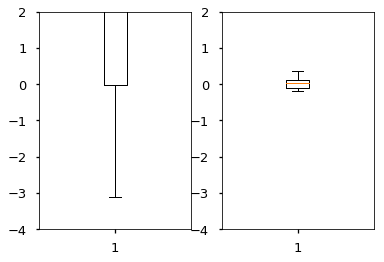

In [117]:
#difference in duration and wear times
diffhome = (homedur[homedur['NewBrace']==1]['Duration_Median'].values - homedur[homedur['NewBrace']==0]['Duration_Median'].values)
print(np.median(diffhome),np.percentile(diffhome,(25,75)))
diffcomm = (dur[dur['NewBrace']==1]['Duration_Median'].values - dur[dur['NewBrace']==0]['Duration_Median'].values)
print(np.median(diffcomm),np.percentile(diffcomm,(25,75)))

fig=plt.figure()
fig.add_subplot(121)
plt.boxplot(diffhome)
plt.ylim([-4,2])

fig.add_subplot(122)
ax2=plt.boxplot(diffcomm)
plt.ylim([-4,2])

In [118]:
#normality test
from scipy.stats import ttest_rel, shapiro
x = homedur[homedur['NewBrace']==0]['Duration_Median']
fstat,pval = shapiro(x)
print(fstat,pval)
y = homedur[homedur['NewBrace']==1]['Duration_Median']
fstat,pval = shapiro(y)
print(fstat,pval)
x = dur[dur['NewBrace']==0]['Duration_Median']
fstat,pval = shapiro(x)
print(fstat,pval)
y = dur[dur['NewBrace']==1]['Duration_Median']
fstat,pval = shapiro(y)
print(fstat,pval)

0.9030442237854004 0.12486790120601654
0.8902328610420227 0.08145947754383087
0.8984516263008118 0.1070990189909935
0.931656002998352 0.32185158133506775


In [119]:
#sign rank test differences in median duration
from scipy.stats import wilcoxon
x = homedur[homedur['NewBrace']==0]['Duration_Median']
y = homedur[homedur['NewBrace']==1]['Duration_Median']
tstat,prob = wilcoxon(x,y)
print('Duration Home',tstat,prob)
x = dur[dur['NewBrace']==0]['Duration_Median']
y = dur[dur['NewBrace']==1]['Duration_Median']
tstat,prob = wilcoxon(x,y)
print('Duration Community',tstat,prob)
x = homedur[homedur['NewBrace']==0]['WearFrac']
y = homedur[homedur['NewBrace']==1]['WearFrac']
tstat,prob = wilcoxon(x,y)
print('Wear Fraction Home',tstat,prob)
x = dur[dur['NewBrace']==0]['WearFrac']
y = dur[dur['NewBrace']==1]['WearFrac']
tstat,prob = wilcoxon(x,y)
print('Wear Fraction Community',tstat,prob)
x = homedur[homedur['NewBrace']==0]['Steps per Hour']
y = homedur[homedur['NewBrace']==1]['Steps per Hour']
tstat,prob = wilcoxon(x,y)
print('Steps Home',tstat,prob)
x = dur[dur['NewBrace']==0]['Steps per Hour']
y = dur[dur['NewBrace']==1]['Steps per Hour']
tstat,prob = wilcoxon(x,y)
print('Steps Community',tstat,prob)

Duration Home 15.0 0.0185667122797
Duration Community 49.0 0.826091028859
Wear Fraction Home 31.0 0.177114040864
Wear Fraction Community 44.0 0.916511907864
Steps Home 40.0 0.43262594902
Steps Community 33.0 0.220898890668


As expected, participants tended to spend more time at home than outside, with either brace. The median time spent home wearing their baseline device (1.46h) was marginally higher than that wearing the C-brace (0.36h, Wilcoxon Sign-rank test, p = 0.048, W=21.0). This result is expected, as participants will tend to favor using the device they are used to (baseline device) when at home. In contrast, time wearing the 2 devices in the community were not significantly different (Baseline time = 0.22h, Cbrace time =0.21h, Wilcoxon Sign-rank test, p = 0.83, W=49.0).

In order to compare usage between the 2 devices, we normalized device use by time spent at each location. We calculated the fraction of time each user is wearing the brace when they are at a certain location (home or community) (TO BE EXPLAINED IN THE METHODS).

Participants spent most time outside in the community wearing either brace


In [120]:
for s in Data['SubjID'].unique():
    lat=Data.loc[(Data['SubjID']==s)&(Data['NewBrace']==1),'Mean Lat']
    lon=Data.loc[(Data['SubjID']==s)&(Data['NewBrace']==1),'Mean Lon']
    locvar=np.log(np.var(lat)+np.var(lon))
    print(s,locvar)

CBR21 1.50733182426
CBR30 -1.79845309713
CBR22 -0.853575022274
CBR27 -4.81679906589
CBR26 -4.42196488504
CBR11 -6.07875192639
CBR16 -3.23282568718
CBR28 -2.87019739538
CBR15 6.63558903507
CBR25 -4.07392611008
CBR19 -2.59472203305
CBR08 -5.67261584433
CBR24 -5.04049960067
CBR31 -3.59248688978


In [121]:
newbrace = 1
for s in Data.SubjID.unique():
    Data_ = Data[(Data['SubjID']==s)&(Data['NewBrace']==newbrace)]
    
    print(s,np.sum(np.unique(Data_['Relative_Duration'])),len(np.unique(Data_['Relative_Duration'])), len(np.unique(Data_['LocID'])))


CBR21 1.0 39 39
CBR30 0.997640757508 82 83
CBR22 0.999185655695 28 29
CBR27 1.0 2 2
CBR26 0.990781177716 30 33
CBR11 0.996556359807 52 57
CBR16 0.997422727858 30 31
CBR28 1.0 4 4
CBR15 1.0 11 11
CBR25 1.0 12 12
CBR19 1.0 4 4
CBR08 0.992913777914 24 25
CBR24 1.0 20 20
CBR31 0.995418374729 19 20


## Mobility features - Community

In [139]:
Featsubj = pd.DataFrame(data=[],columns=['SubjID','NewBrace','Nlocs','LocVar','MedianDur','MedianSpd',
                                         'MeanDistHome','top2RelDur','Entropy', 'Age', 'BaselineYrs', '6mWT', '10mWTss',
                                         '10mWTfast','Npoints','Steps','Steps per Hour','WearFrac'])

In [140]:
ind = 0
for newbrace in Data.NewBrace.unique():
    for s in Data.SubjID.unique():
        ind+=1
        Data_ = Data[(Data['SubjID']==s)&(Data['NewBrace']==newbrace)]
        
        nlocs = len(Data_['LocID'].unique())
        
        locvar=np.log(np.var(Data_['Mean Lat']) + np.var(Data_['Mean Lon']))        
        
        medDur = Data_['Duration'].median() #*24 #HOURS
        
        medSpd = Data_['Mean Speed'].median()
  
        meanDistHome = Data_['Distance'].mean()/1000
        
        top2RelDur = np.sum(np.unique(Data_['Relative_Duration'])[-2:])
        
        Entropy = entropy(np.unique(Data_['Relative_Duration']))

#         WearFrac = np.nansum(Data_['Wear Frac']*Data_['Duration'])/(np.nansum(Data_['Duration'])+1e-16)
        WearFrac = np.nanmean(Data_['Wear Frac'])
    
        Npoints = len(Data_)
        
        steps = np.nanmean(Data_['Steps'])
        stepsHr = np.nanmean(Data_['Steps per Hour'])
        

        
        fpd=(pd.DataFrame({'SubjID':s,'NewBrace':newbrace,'Nlocs':nlocs,'LocVar':locvar,'MedianDur':medDur,
                         'MedianSpd':medSpd,'MeanDistHome':meanDistHome, 'top2RelDur':top2RelDur,'Entropy':Entropy,
                          'Age':Data_['Age'].unique(), 'BaselineYrs': Data_['BaselineYrs'].unique(), 
                          '6mWT':Data_['6mwt'].unique(), '10mWTss':Data_['10mwt_ss'].unique(), 
                          '10mWTfast':Data_['10mwt_fast'].unique(),'Npoints':Npoints,'WearFrac':WearFrac,
                           'Steps':steps, 'Steps per Hour':stepsHr},index=[ind]))
    
        Featsubj=pd.concat([Featsubj,fpd])

    

In [141]:
Featsubj.head()

,10mWTfast,10mWTss,6mWT,Age,BaselineYrs,Entropy,LocVar,MeanDistHome,MedianDur,MedianSpd,NewBrace,Nlocs,Npoints,Steps,Steps per Hour,SubjID,WearFrac,top2RelDur
1,0.85,0.69,231.93,65,60.0,2.061553,1.507332,0.107750,0.661944,1.015304,1,39,67,2.283582,13.478047,CBR21,0.033078,0.665099
2,1.47,1.20,452.17,55,37.0,2.853499,-1.798453,0.021663,0.411111,0.921783,1,83,174,286.632184,386.364495,CBR30,0.938007,0.471777
3,1.20,1.00,332.61,28,2.0,1.817652,-0.853575,0.022623,0.511111,0.828132,1,29,51,96.019608,222.484325,CBR22,0.845676,0.686630
4,0.63,0.46,133.60,72,70.0,0.471462,-4.816799,0.007647,0.491389,2.330390,1,2,2,51.000000,100.778111,CBR27,1.000000,1.000000
5,1.58,1.15,512.14,52,0.5,2.367757,-4.421965,0.005246,0.224167,0.658080,1,33,77,134.064935,361.052923,CBR26,0.974758,0.506524


In [142]:
#add OPUS data
OPUSdata= pd.read_excel('OPUS.xlsx')
sid = OPUSdata.SubjID
newstr = []
for s in sid.values:
    newstr.append(s.replace('-',''))
OPUSdata.SubjID = newstr

In [143]:
Featsubj = pd.merge(left=Featsubj,right=OPUSdata,how='inner',left_on=['SubjID','NewBrace'],right_on=['SubjID','NewBrace'])
homedur = pd.merge(left=homedur,right=OPUSdata,how='inner',left_on=['SubjID','NewBrace'],right_on=['SubjID','NewBrace'])

In [144]:
D = homedur[homedur['NewBrace']==0].drop('SubjID',axis=1)

D['6mWTdiff']=homedur.loc[homedur['NewBrace']==1,'6mwt'].values-homedur.loc[homedur['NewBrace']==0,'6mwt'].values
D['Weardiff']=homedur.loc[homedur['NewBrace']==1,'WearFrac'].values-homedur.loc[homedur['NewBrace']==0,'WearFrac'].values
D['OPUSdiff']=homedur.loc[homedur['NewBrace']==1,'OPUS'].values-homedur.loc[homedur['NewBrace']==0,'OPUS'].values

fcorr = D.drop('NewBrace',axis=1).corr()
plt.figure(figsize=(12,10))
sns.heatmap(data=fcorr,annot=True,fmt='.1f')
sns.set_context('talk',font_scale=1)
plt.title('Baseline Features')

KeyError: 'the label [OPUS] is not in the [columns]'

In [145]:
homeTemp = homedur[['NewBrace','SubjID','WearFrac']].rename(columns={'WearFrac':'HomeWearFrac'})
Featsubj = pd.merge(left = Featsubj,right = homeTemp, how='inner', left_on = ['NewBrace','SubjID'], 
         right_on = ['NewBrace','SubjID'])

In [130]:
Featsubj.head()

,10mWTfast,10mWTss,6mWT,Age,BaselineYrs,Entropy,LocVar,MeanDistHome,MedianDur,MedianSpd,NewBrace,Nlocs,Npoints,Steps,Steps per Hour,SubjID,WearFrac,top2RelDur,OPUS,HomeWearFrac
0,0.85,0.69,231.93,65,60.0,2.061553,1.507332,0.107750,0.661944,1.015304,1,39,67,NaN,NaN,CBR21,0.033078,0.665099,44.79,0.019349
1,1.47,1.20,452.17,55,37.0,2.853499,-1.798453,0.021663,0.411111,0.921783,1,83,174,NaN,NaN,CBR30,0.938007,0.471777,39.93,0.360443
2,1.20,1.00,332.61,28,2.0,1.817652,-0.853575,0.022623,0.511111,0.828132,1,29,51,NaN,NaN,CBR22,0.845676,0.686630,47.52,0.847683
3,0.63,0.46,133.60,72,70.0,0.471462,-4.816799,0.007647,0.491389,2.330390,1,2,2,NaN,NaN,CBR27,1.000000,1.000000,41.51,0.004478
4,1.58,1.15,512.14,52,0.5,2.367757,-4.421965,0.005246,0.224167,0.658080,1,33,77,NaN,NaN,CBR26,0.974758,0.506524,69.12,0.050284


## Cbrace vs Baseline features

In [131]:
#** Regression Analysis **
# from scipy import stats
# features = ['Nlocs','LocVar','MedianDur','MedianSpd','Entropy','6mWT','10mWTss','WearFrac']
# outcome = ['WearFrac']

# for f in features:
#     x = Featsubj[Featsubj['NewBrace']==0][f]
#     y = Featsubj[Featsubj['NewBrace']==1][f]
#     x-y
#     slope, intercept, r_value, p_value, std_err = stats.linregress(x.values.astype('float32'),(y.values-x.values).astype('float32'))
#     print(f, slope,intercept,p_value)
#     plt.figure(figsize=(8,6))
#     sns.regplot(x.astype('float32'),(y.values-x.values).astype('float32'))

In [146]:
Featsubj.head()

,10mWTfast,10mWTss,6mWT,Age,BaselineYrs,Entropy,LocVar,MeanDistHome,MedianDur,MedianSpd,NewBrace,Nlocs,Npoints,Steps,Steps per Hour,SubjID,WearFrac,top2RelDur,OPUS,HomeWearFrac
0,0.85,0.69,231.93,65,60.0,2.061553,1.507332,0.107750,0.661944,1.015304,1,39,67,2.283582,13.478047,CBR21,0.033078,0.665099,44.79,0.019349
1,1.47,1.20,452.17,55,37.0,2.853499,-1.798453,0.021663,0.411111,0.921783,1,83,174,286.632184,386.364495,CBR30,0.938007,0.471777,39.93,0.360443
2,1.20,1.00,332.61,28,2.0,1.817652,-0.853575,0.022623,0.511111,0.828132,1,29,51,96.019608,222.484325,CBR22,0.845676,0.686630,47.52,0.847683
3,0.63,0.46,133.60,72,70.0,0.471462,-4.816799,0.007647,0.491389,2.330390,1,2,2,51.000000,100.778111,CBR27,1.000000,1.000000,41.51,0.004478
4,1.58,1.15,512.14,52,0.5,2.367757,-4.421965,0.005246,0.224167,0.658080,1,33,77,134.064935,361.052923,CBR26,0.974758,0.506524,69.12,0.050284


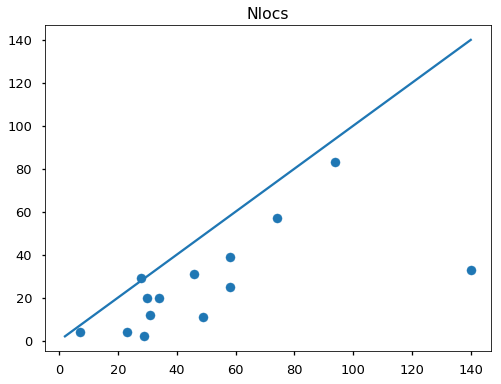

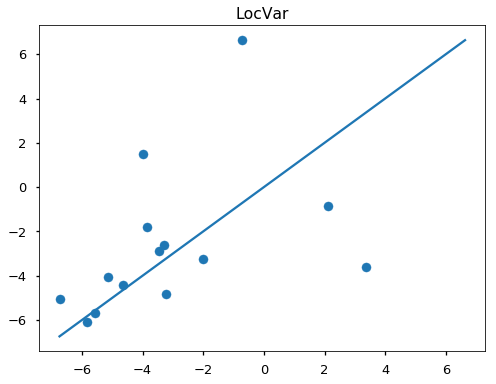

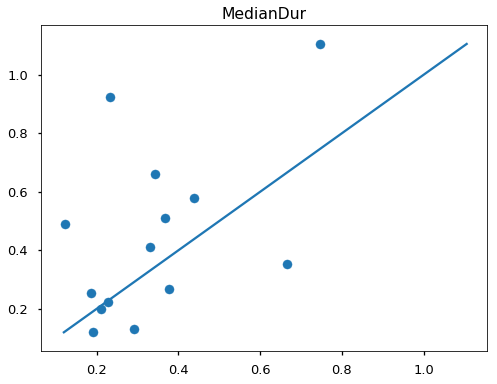

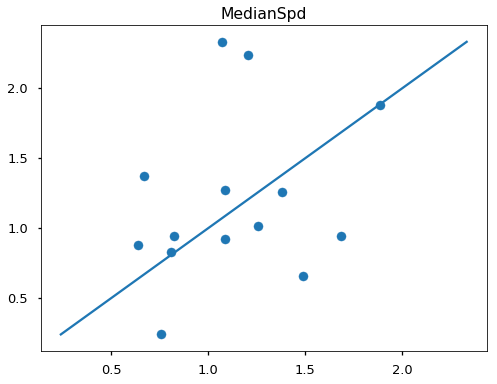

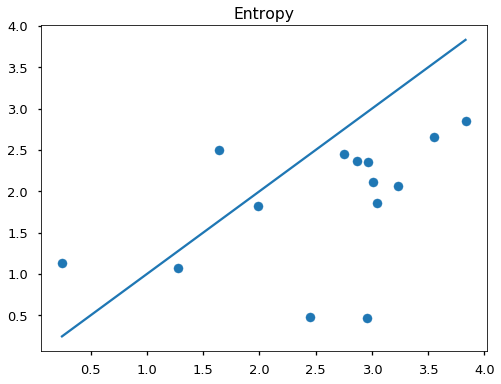

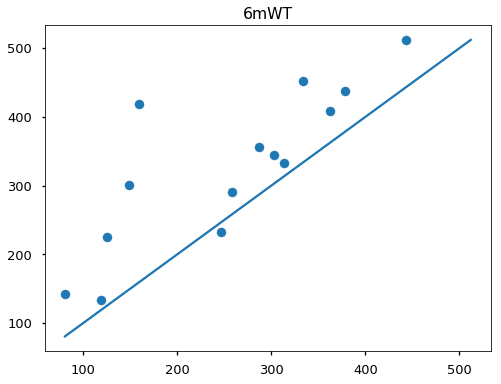

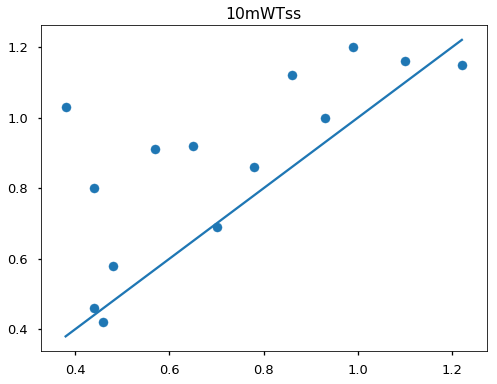

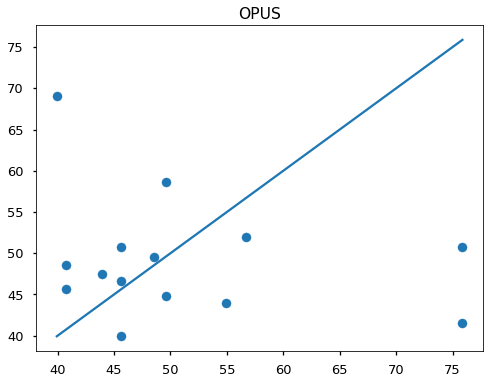

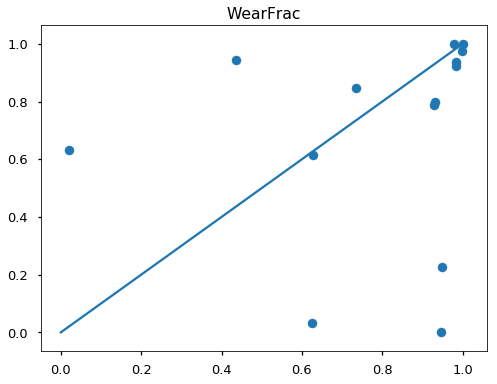

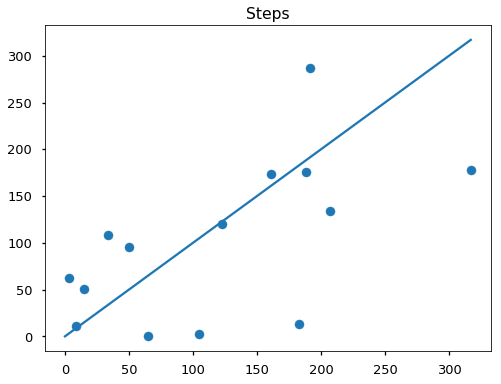

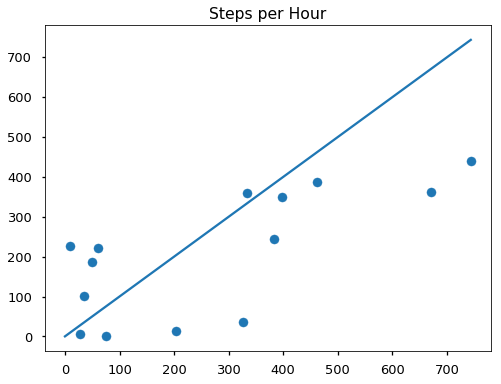

In [147]:
features = ['Nlocs','LocVar','MedianDur','MedianSpd','Entropy','6mWT','10mWTss','OPUS','WearFrac', 'Steps', 'Steps per Hour']
outcome = ['WearFrac']

for f in features:
    x = Featsubj[Featsubj['NewBrace']==0][f]
    y = Featsubj[Featsubj['NewBrace']==1][f]
    plt.figure(figsize=(8,6))
    plt.scatter(x,y)    
    mx=min(x)
    my=min(y)
    m = min(mx,my)
    Mx=max(x)
    My=max(y)
    M =max(Mx,My)
    plt.plot([m,M],[m,M])
    plt.title(f)
    if f == 'MeanDistHome':
        plt.xlim([-10,200])
        plt.ylim([-10,200])
    
    


In [249]:
# #shapiro test for normality - sanity check
# for i in range(1,4):
#     n = 10**i
#     x = np.random.randn(n)
#     y = np.random.randn(n)
#     fstat,pval = shapiro(x-y)
#     print(n,fstat,pval)

In [248]:
# #normality test
# from scipy.stats import ttest_rel, shapiro

# for f in features:
#     x = Featsubj[Featsubj['NewBrace']==0][f]
#     y = Featsubj[Featsubj['NewBrace']==1][f]
#     fstat,pval = shapiro(x)
#     print(f,tstat,pval)

## t-test / non-parametric comparisons between baseline and cbrace features

In [250]:
# #paired t-test
# from scipy.stats import ttest_rel, shapiro
# for f in features:
#     x = Featsubj[Featsubj['NewBrace']==0][f]
#     y = Featsubj[Featsubj['NewBrace']==1][f]
#     tstat,prob = ttest_rel(x,y)
#     print(f,tstat,prob)
    


In [175]:
from scipy.stats import wilcoxon
for f in features:
    x = Featsubj[Featsubj['NewBrace']==0][f]
    y = Featsubj[Featsubj['NewBrace']==1][f]
    tstat,prob = wilcoxon(x,y)
    print(f,tstat,prob)


Nlocs 1.0 0.0012114149768
LocVar 43.0 0.550923682773
MedianDur 32.0 0.198122911754
MedianSpd 48.0 0.777564616857
Entropy 13.0 0.0131503642343
6mWT 2.0 0.00152327574137
10mWTss 10.0 0.00763041473925
OPUS 51.0 0.924978307121
WearFrac 28.0 0.221330082994


## Pairwise correlations between baseline features and Cbrace Wear Time

In [152]:
features = ['Nlocs','LocVar','MedianDur','MedianSpd','Entropy','6mWT','10mWTss','WearFrac','OPUS','Age','BaselineYrs', 'Steps','Steps per Hour','HomeWearFrac']

In [62]:
plt.scatter(F['6mWT'],F['WearFrac'])

NameError: name 'F' is not defined

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Featsubj['SubjID'] = le.fit_transform(Featsubj['SubjID'])

In [42]:
cols = ['#7e1e9c','#15b01a','#0343df','#ff81c0','#653700','#e50000','#95d0fc','#029386','#f97306','#96f97b','#c20078',
       '#ffff14','#06c2ac','#c79fef']

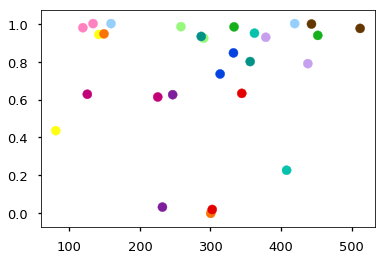

In [43]:
Fs = Featsubj
plt.scatter(Featsubj['6mWT'],Featsubj['WearFrac'],c=cols )

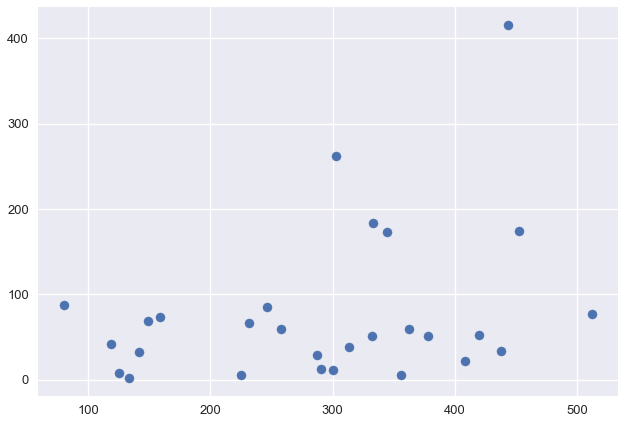

In [113]:
plt.scatter(Featsubj['6mWT'],Featsubj['Npoints'])

In [151]:
Featsubj

,10mWTfast,10mWTss,6mWT,Age,BaselineYrs,Entropy,LocVar,MeanDistHome,MedianDur,MedianSpd,NewBrace,Nlocs,Npoints,Steps,Steps per Hour,SubjID,WearFrac,top2RelDur,OPUS,HomeWearFrac
0,0.85,0.69,231.93,65,60.00,2.061553,1.507332,0.107750,0.661944,1.015304,1,39,67,2.283582,13.478047,CBR21,0.033078,0.665099,44.79,0.019349
1,1.47,1.20,452.17,55,37.00,2.853499,-1.798453,0.021663,0.411111,0.921783,1,83,174,286.632184,386.364495,CBR30,0.938007,0.471777,39.93,0.360443
2,1.20,1.00,332.61,28,2.00,1.817652,-0.853575,0.022623,0.511111,0.828132,1,29,51,96.019608,222.484325,CBR22,0.845676,0.686630,47.52,0.847683
3,0.63,0.46,133.60,72,70.00,0.471462,-4.816799,0.007647,0.491389,2.330390,1,2,2,51.000000,100.778111,CBR27,1.000000,1.000000,41.51,0.004478
4,1.58,1.15,512.14,52,0.50,2.367757,-4.421965,0.005246,0.224167,0.658080,1,33,77,134.064935,361.052923,CBR26,0.974758,0.506524,69.12,0.050284
5,1.16,0.92,344.42,35,5.00,1.070010,-6.078752,0.003910,0.119444,0.942351,1,57,173,62.011561,227.396012,CBR11,0.632417,0.835351,45.66,0.150211
6,1.29,1.03,419.40,44,1.00,2.361202,-3.232826,0.026949,0.254167,1.260868,1,31,52,173.153846,348.414450,CBR16,1.000000,0.505523,58.59,0.260187
7,1.13,0.91,356.29,44,0.08,0.475478,-2.870197,0.017992,0.580000,2.239660,1,4,5,176.000000,245.193879,CBR28,0.800000,0.979381,52.00,0.050431
8,1.08,0.80,300.41,68,0.50,1.857198,6.635589,0.551872,1.105278,1.374313,1,11,11,0.000000,0.000000,CBR15,0.000000,0.524957,46.57,0.000000
9,1.14,0.86,290.50,68,66.00,2.111528,-4.073926,0.012428,0.266667,1.881073,1,12,13,178.307692,438.866530,CBR25,0.923077,0.464802,50.75,0.224935


Text(0.5,1,'Baseline Features')

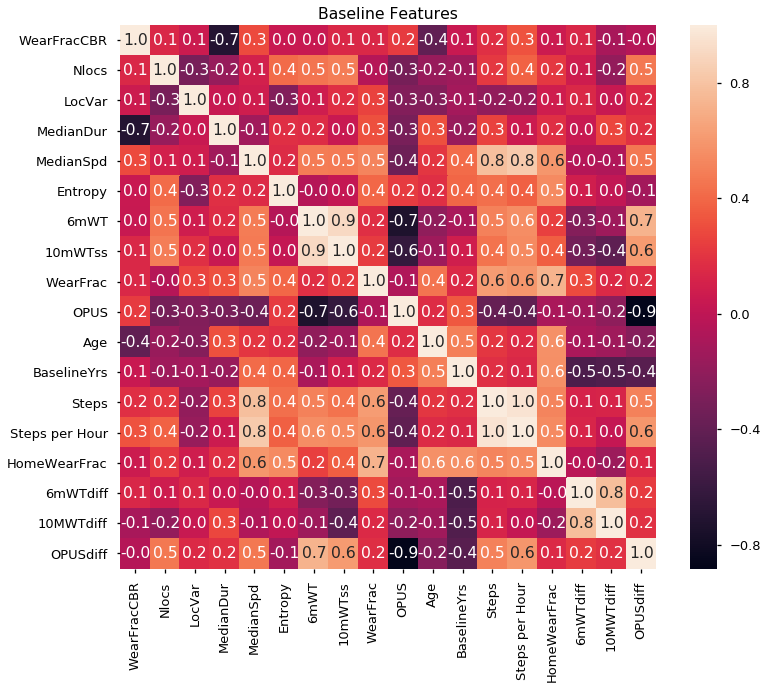

In [153]:
F = Featsubj[Featsubj['NewBrace']==0].reset_index(drop=True).copy()
outcome = Featsubj[Featsubj['NewBrace']==1]['WearFrac'].reset_index(drop=True).rename('WearFracCBR')
F = pd.concat((F,outcome),axis=1)
F=F.drop('NewBrace',axis=1)
F=F[['WearFracCBR']+features]
F.astype(float)
F.Age = pd.to_numeric(F.Age)
F.Nlocs = pd.to_numeric(F.Nlocs)
F['6mWTdiff']=Featsubj.loc[Featsubj['NewBrace']==1,'6mWT'].values-Featsubj.loc[Featsubj['NewBrace']==0,'6mWT'].values
F['10MWTdiff']=Featsubj.loc[Featsubj['NewBrace']==1,'10mWTss'].values-Featsubj.loc[Featsubj['NewBrace']==0,'10mWTss'].values
F['OPUSdiff']=Featsubj.loc[Featsubj['NewBrace']==1,'OPUS'].values-Featsubj.loc[Featsubj['NewBrace']==0,'OPUS'].values
fcorr = F.corr()
plt.figure(figsize=(12,10))
sns.heatmap(data=fcorr,annot=True,fmt='.1f')
sns.set_context('talk',font_scale=1)
plt.title('Baseline Features')

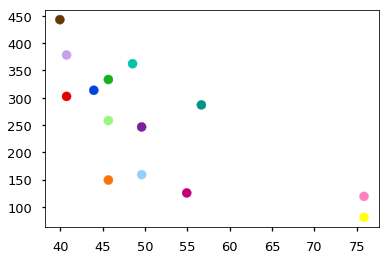

In [201]:
plt.scatter(F['OPUS'],F['6mWT'],c=cols)

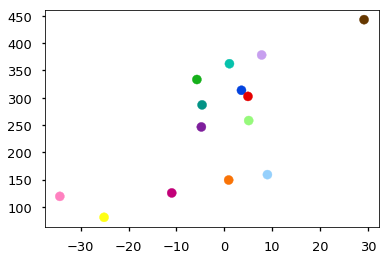

In [202]:
plt.scatter(F['OPUSdiff'],F['6mWT'],c=cols)

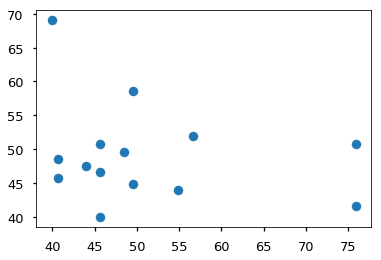

In [194]:
plt.scatter(Featsubj.loc[Featsubj['NewBrace']==0,'OPUS'],Featsubj.loc[Featsubj['NewBrace']==1,'OPUS'])

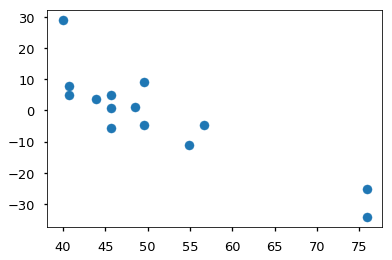

In [191]:
plt.scatter(F['OPUS'],F['OPUSdiff'])

In [41]:
x=F['6mWTdiff']
y=F['WearFracCBR']
pearsonr(x,y)

(0.13657897996777371, 0.64151712840866848)

In [315]:
spearmanr(x,y)

SpearmanrResult(correlation=0.15164835164835166, pvalue=0.60479059845213667)

## Pairwise correlation with wear fraction difference

In [122]:
 weardiff=Featsubj[Featsubj['NewBrace']==1]['WearFrac'].values-Featsubj[Featsubj['NewBrace']==0]['WearFrac'].values

In [123]:
df = Featsubj.loc[Featsubj['NewBrace']==0,features]
df['weardiff']=weardiff

In [124]:
df=df.drop('WearFrac',axis=1)
df.Nlocs = pd.to_numeric(df.Nlocs)
df.Age = pd.to_numeric(df.Age)

In [125]:
df['6mWTdiff']=Featsubj.loc[Featsubj['NewBrace']==1,'6mWT'].values-Featsubj.loc[Featsubj['NewBrace']==0,'6mWT'].values
df['10MWTdiff']=Featsubj.loc[Featsubj['NewBrace']==1,'10mWTss'].values-Featsubj.loc[Featsubj['NewBrace']==0,'10mWTss'].values
df['OPUSdiff']=Featsubj.loc[Featsubj['NewBrace']==1,'OPUS'].values-Featsubj.loc[Featsubj['NewBrace']==0,'OPUS'].values

In [126]:
df.head()

,Nlocs,LocVar,MedianDur,MedianSpd,Entropy,6mWT,10mWTss,OPUS,Age,BaselineYrs,HomeWearFrac,weardiff,6mWTdiff,10MWTdiff,OPUSdiff
14,58.0,-4.000276,0.341667,1.254397,3.228757,246.46,0.70,49.59,65.0,60.0,0.260979,-0.592380,-14.53,-0.01,-4.80
15,94.0,-3.852770,0.329444,1.088038,3.832470,333.45,0.99,45.66,55.0,37.0,0.370282,-0.044837,118.72,0.21,-5.73
16,28.0,2.116022,0.368056,0.806337,1.987643,313.69,0.93,43.94,28.0,2.0,0.155618,0.111041,18.92,0.07,3.58
17,29.0,-3.216065,0.122222,1.072029,2.953799,119.18,0.44,75.87,72.0,70.0,0.501784,0.021547,14.42,0.02,-34.36
18,140.0,-4.645246,0.228333,1.486714,2.867158,443.20,1.22,39.93,52.0,0.5,0.445799,-0.023049,68.94,-0.07,29.19


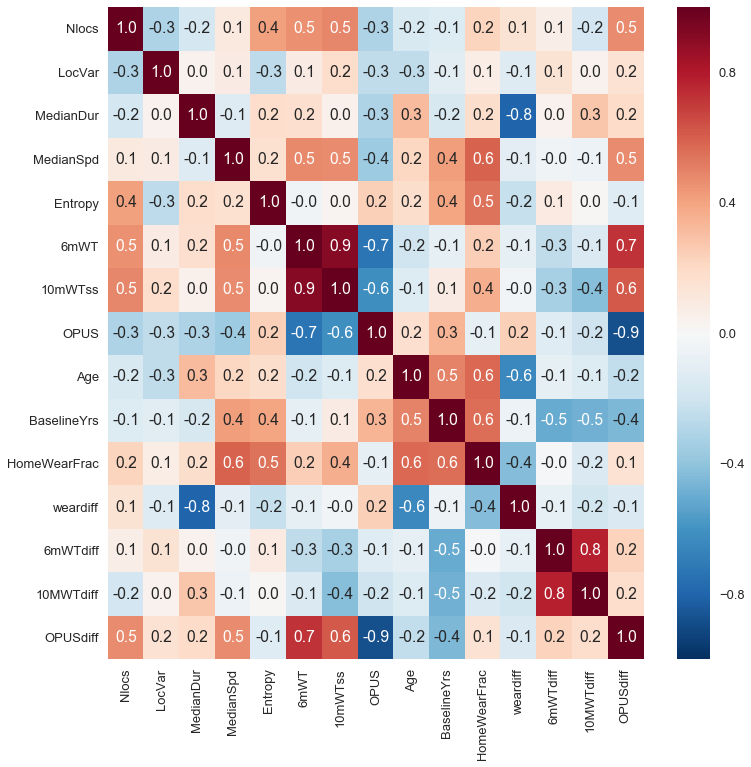

In [127]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,fmt='.1f')

** We used 3 main types of features: Mobility (GPS derived), demographics (age, years using baseline device) and Clinical (6mWT and 10MWT)**

* There was no strong linear correlation (Pearson's r <= .6) between any of the baseline features and the usage (wear time ratio) of the new Cbrace device.


* The feature with the strongest correlation (r = 0.6) was the Median duration (stay) at a given location, which was negatively correlated with wear time. This could be indicative that subjects who wore the Cbrace more, were the ones who tended to use their baseline brace for shorter trips/visits.


* Interestingly there was no correlation at all (r = 0.0) with the Clinical tests using their baseline or Cbrace (see following plot). This is suggestive that performance with their baseline/Cbrace device was not correlated with usage of the Cbrace


* Wear fraction of their baseline device also did not correlate substantially (r = 0.4) with the wear fraction of the Cbrace across all subjects (however see other plot showing clustring of subjects into 3 groups)

## Pairwise correlations between Cbrace features and Cbrace Wear Time

In [184]:
features

['Nlocs',
 'LocVar',
 'MedianDur',
 'MedianSpd',
 'Entropy',
 '6mWT',
 '10mWTss',
 'WearFrac',
 'OPUS',
 'Age',
 'BaselineYrs']

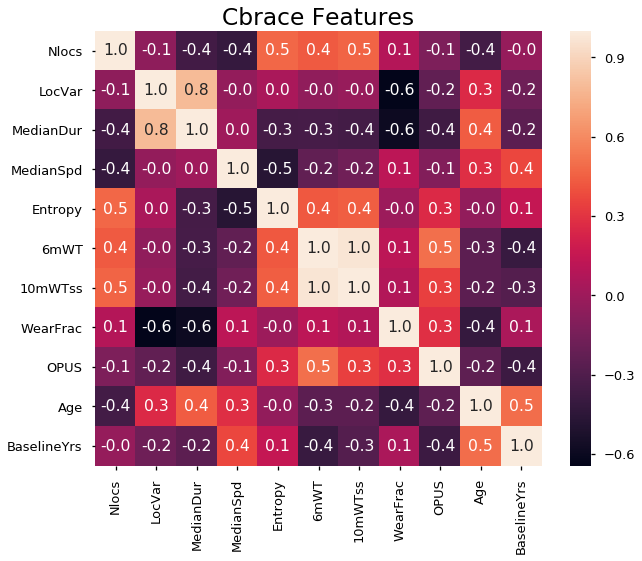

In [198]:
#correlations between Cbrace mobility features and wear time
F = Featsubj[Featsubj['NewBrace']==1].reset_index(drop=True).copy()
F=F.drop('NewBrace',axis=1)
F=F[features]
F['WearFrac'].rename('WearFracCBR')
F.astype(float)
F.Age = pd.to_numeric(F.Age)
F.Nlocs = pd.to_numeric(F.Nlocs)
fcorr = F.corr()
plt.figure(figsize=(10,8))
sns.heatmap(data=fcorr,annot=True,fmt='.1f')
sns.set_context('talk',font_scale=1.5)
plt.title('Cbrace Features')

As before we do not see any significant correlation between Cbrace wear time and Cbrace features (clinical, mobility)

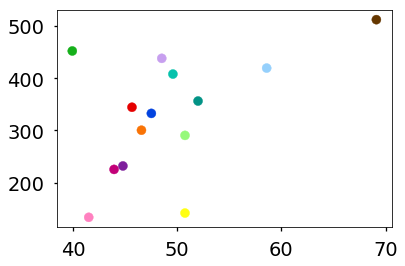

In [199]:
plt.scatter(F['OPUS'],F['6mWT'],c=cols)

## Grouping individuals based on preference at wearing Baseline or Cbrace device

In [12]:
x = Featsubj[Featsubj['NewBrace']==0]['WearFrac']
y = Featsubj[Featsubj['NewBrace']==1]['WearFrac']
ei= y.values-x.values
stdei = np.std(ei)

In [13]:
stdei

0.394717692979553

In [14]:
Databaseline = Featsubj[Featsubj['NewBrace']==0].copy()
Databaseline['Preference'] = 'No_Preference'
ind1 = np.where(ei>=0.4)
Databaseline['Preference'].values[ind1]='Cbrace'
ind0 = np.where(ei<=-.4)
Databaseline['Preference'].values[ind0]='Baseline'


In [16]:
Databaselinenorm= Databaseline[features+['Age','BaselineYrs']].apply(lambda x: (x-np.min(x))/(np.max(x)-np.min(x))  )

In [17]:
Databaselinenorm['Preference']=Databaseline['Preference']

In [18]:
Databaselinemelt=pd.melt(Databaselinenorm,id_vars='Preference',value_vars=features+['Age','BaselineYrs'])

In [19]:
Databaselinemelt['value'] = pd.to_numeric(Databaselinemelt['value'])

In [20]:
Databaselinemelt.head()

,Preference,variable,value
0,Baseline,Nlocs,0.383459
1,No_Preference,Nlocs,0.654135
2,No_Preference,Nlocs,0.157895
3,No_Preference,Nlocs,0.165414
4,No_Preference,Nlocs,1.000000


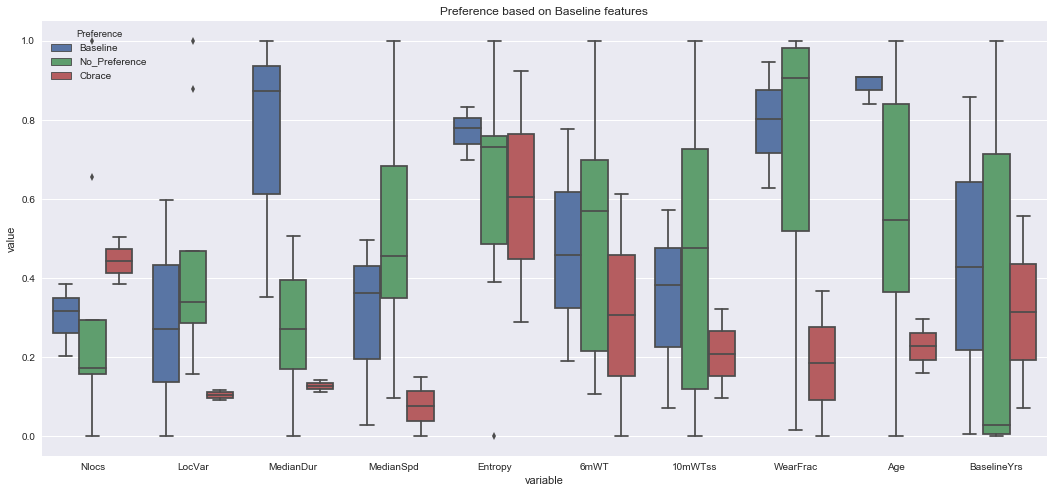

In [21]:
plt.figure(figsize=(18,8))
sns.boxplot(data=Databaselinemelt,x='variable',y='value',hue='Preference')
plt.title('Preference based on Baseline features')